In [149]:
import numpy as np
import math
from matplotlib import pylab as plt
%matplotlib inline

In [181]:
from svgpathtools import svg2paths
#paths, attributes = svg2paths('/Users/michaelkapuscik/git/toolcat/out/svg/0-test.svg')
paths, attributes = svg2paths('/Users/michaelkapuscik/git/toolcat/out/svg/123-3\8-in-box-wrench.svg')

In [182]:
#paths

In [183]:
#dir(paths[0])

In [184]:
points = [(controlpoint.start.real, controlpoint.start.imag) for controlpoint in paths[0]]

In [185]:
points = np.array(points)

In [186]:
normalization_offset = (np.average(points[:,0]), np.average(points[:,1]))

In [187]:
normalized_points = np.array([points[:,0] - normalization_offset[0], points[:,1] - normalization_offset[1]]).transpose()

In [188]:
normalized_points

array([[-1619.71428571,   947.19047619],
       [-1704.71428571,   689.19047619],
       [-1505.71428571,   567.19047619],
       [ -508.71428571,    92.19047619],
       [  561.28571429,  -602.80952381],
       [  681.28571429,  -718.80952381],
       [ 1005.28571429,  -688.80952381],
       [  921.28571429,  -642.80952381],
       [  778.28571429,  -567.80952381],
       [  839.28571429,  -368.80952381],
       [  867.28571429,  -347.80952381],
       [  949.28571429,  -369.80952381],
       [ 1054.28571429,  -398.80952381],
       [  910.28571429,  -236.80952381],
       [  695.28571429,  -202.80952381],
       [  538.28571429,  -197.80952381],
       [  355.28571429,  -105.80952381],
       [ -483.71428571,   339.19047619],
       [-1365.71428571,   880.19047619],
       [-1452.71428571,   967.19047619],
       [-1515.71428571,   967.19047619]])

In [189]:
x = normalized_points[:,0]
y = normalized_points[:,1]

In [190]:
#compute covarience for normalizaed points
#why does the covariance matrix yield a 2x2?
np.cov([x,y])

array([[ 1150198.51428571,  -614258.05714286],
       [ -614258.05714286,   362676.46190476]])

In [191]:
#get eigenvectors to represent major and minor axes of tool
(eigenvalues, eigenvectors) = np.linalg.eigh(np.cov([x,y]))
print(eigenvalues,eigenvectors)

[   26806.96069696  1486068.01549352] [[-0.4797542  -0.87740293]
 [-0.87740293  0.4797542 ]]


In [192]:
#scale the vectors to make them plotable
eigen1 = eigenvectors[0] * np.max(x)/4
eigen2 = eigenvectors[1] * np.max(x)/4

print(eigen1,eigen2)

[-126.44950079 -231.25834409] [-231.25834409  126.44950079]


In [193]:
(evec1_x, evec1_y), (evec2_x, evec2_y)

((0.67905260931096922, 1), (-1.4726399490824345, 1))

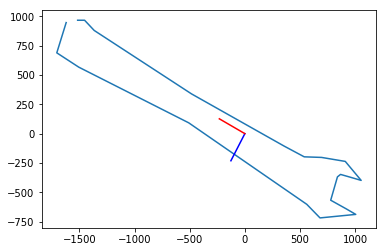

In [194]:
plt.plot(x,y)
plt.plot([0,eigen1[0]], [0, eigen1[1]], 'b') 
plt.plot([0,eigen2[0]], [0, eigen2[1]], 'r') 

In [195]:
#find major axis of part
major_eigenvector = eigenvectors[0]
if eigenvalues[0] < eigenvalues[1]:
    major_eigenvector = eigenvectors[1]


In [196]:
# todo: try rotating around center by the sine,cosine in major_eigenvector
rot_radians = math.atan2(major_eigenvector[1],major_eigenvector[0])
rot_radians * 180 / math.pi

151.33065010893029

(-5000, 5000)

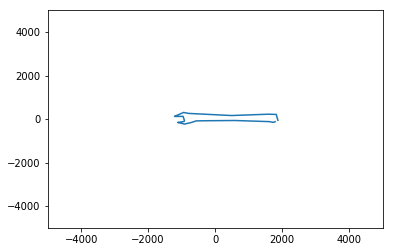

In [197]:
s = math.sin(rot_radians)
c = math.cos(rot_radians)
xp = x * c + y * s
yp = -x * s + y * c
plt.plot(xp, yp)
plt.xlim(-5000,5000)
plt.ylim(-5000,5000)